# Overview

1) A user table ("takehome_users") with data on 12,000 users who signed up for the product in the last two years. This table includes:

* name: the user's name

* object_id: the user's id

* email: email address

* creation_source: how their account was created. This takes on one
of 5 values:

    * PERSONAL_PROJECTS: invited to join another user's personal workspace
    * GUEST_INVITE: invited to an organization as a guest (limited permissions)
    * ORG_INVITE: invited to an organization (as a full member)
    * SIGNUP: signed up via the website
    * SIGNUP_GOOGLE_AUTH: signed up using Google
    Authentication (using a Google email account for their login
    id)
    

* creation_time: when they created their account
* last_session_creation_time: unix timestamp of last login
* opted_in_to_mailing_list: whether they have opted into receiving
marketing emails
* enabled_for_marketing_drip: whether they are on the regular
marketing email drip
* org_id: the organization (group of users) they belong to
* invited_by_user_id: which user invited them to join (if applicable).

2) A usage summary table ("takehome_user_engagement") that has a row for each day that a user logged into the product.
Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, identify which factors predict future user adoption.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import chardet

In [7]:
users_engagement = pd.read_csv('takehome_user_engagement.csv', engine='python')

In [15]:
with open('takehome_users.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.7296934, 'language': ''}

In [16]:
users = pd.read_csv('takehome_users.csv', encoding= 'ISO-8859-1')

In [17]:
users_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [20]:
users_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [21]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [19]:
# change type to_datetime
users_engagement['time_stamp'] = pd.to_datetime(users_engagement['time_stamp'])

In [22]:
users['creation_time'] = pd.to_datetime(users['creation_time'])

In [23]:
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'])

In [24]:
print(users_engagement.info(), users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time

In [25]:
users.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

<hr>

In [28]:
print(users_engagement['time_stamp'].min(), users_engagement['time_stamp'].max())

2012-05-31 08:20:06 2014-06-06 14:58:50


In [32]:
users_engagement['date'] = users_engagement['time_stamp'].dt.date

<AxesSubplot: xlabel='time_stamp'>

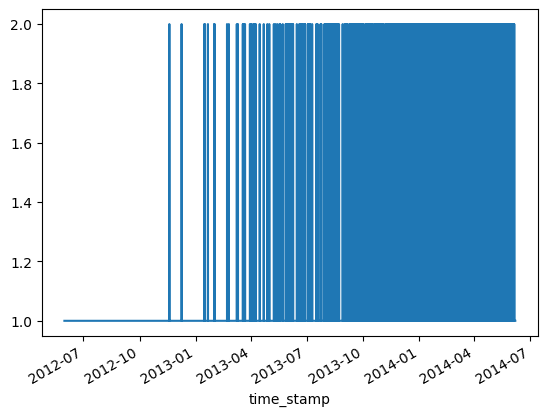

In [33]:
users_engagement.groupby(['time_stamp'])['user_id'].count().plot()

In [34]:
engagement_weekly = users_engagement.groupby([pd.Grouper(key='time_stamp', freq='W'), 'user_id']).visited.sum().to_frame()


In [35]:
engagement_weekly[engagement_weekly.visited >= 3]

visited
time_stamp user_id         
2012-06-10 1693           3
2012-06-17 728            4
           11764          3
2012-06-24 1693           3
           5297           3
...                     ...
2014-06-08 11573          3
           11688          3
           11806          3
           11895          3
           11924          3

[33859 rows x 1 columns]

In [36]:
engagement_weekly.reset_index(inplace=True)

In [37]:
engagement_weekly.user_id[engagement_weekly.visited >= 3].nunique()

1445

In [38]:
adopted_users = engagement_weekly[engagement_weekly.visited >= 3].groupby(['user_id'])['visited'].sum().to_frame()


In [39]:
adopted_users['adopted'] = 1
adopted_users.head()

,visited,adopted
user_id,,
2,3,1
10,249,1
20,3,1
33,3,1
42,331,1
